### 导入需要用到的库
- 执行magic命令'%matplotlib inline'后，绘图将直接呈现在notebook中
- 导入scipy库
- 导入matplotlib.pyplot和numpy两个库

In [1]:
%matplotlib inline
from scipy import optimize
import matplotlib.pyplot as pl
import numpy as np

### 1. [Optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html)

scipy.optimize提供了一些通用的优化算法。可以通过
```python
from scipy import optimize
```
导入. 该模块主要包括:

1. Unconstrained and constrained minimization of multivariate scalar functions (<u>minimize</u>) using a variety of algorithms (e.g. <u>BFGS, Nelder-Mead simplex, Newton Conjugate Gradient, COBYLA or SLSQP</u>)
2. Global (brute-force) optimization routines (e.g. <u>basinhopping, differential_evolution</u>)
3. Least-squares minimization (<u>least_squares</u>) and curve fitting (<u>curve_fit</u>) algorithms
4. Scalar univariate functions minimizers (<u>minimize_scalar</u>) and root finders (<u>newton</u>)
5. Multivariate equation system solvers (<u>root</u>) using a variety of algorithms (e.g. <u>hybrid Powell, Levenberg-Marquardt or large-scale methods such as Newton-Krylov</u>).

### 1.1 [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize)

*示例*

定义函数ROSENBROCK函数
$f(x)=\sum_{i=1}^{N-1}100(x_i-x_{i-1}^2)^2+(1-x_{i-1})^2$

以下例子计算$[x_1,x_2,x_3,x_4,x_5]$对应的最小值。

In [2]:
def rosen(x):
    return np.sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

In [3]:
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2, 2.0])
try:
    res = optimize.minimize(rosen,x0,method='nelder-mead',options={'xtol':1e-10, 'disp':True})
except Exceptions,e:
    print e

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 745
         Function evaluations: 1184


- 获取达到最小值对应的x值

In [26]:
res.x

array([ 1.,  1.,  1.,  1.,  1.,  1.])

In [27]:
res.fun

1.1155705697771878e-21

### 1.2 [最小二乘拟合](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.leastsq.html#scipy.optimize.leastsq)

假设有一组实验数据$(x[i],y[i])$，我们知道它们之间的函数关系:$y = f(x)$，通过这些已知信息，需要确定函数中的一些参数项。例如，如果f是一个线型函数$f(x)=k\cdot x+b$，那么参数k和b就是我们需要确定的值。如果将这些参数用p表示的话，那么我们就是要找到一组p值使得如下公式中的S函数最小:
$$S(p)=\sum_{i=1}^m[y_i-f(x_i,p)]^2$$
scipy中的子函数库optimize已经提供了实现最小二乘拟合算法的函数leastsq。可以通过：
```python
from scipy.optimize import leastsq
```
导入。


In [4]:
from scipy.optimize import leastsq

def func(x, p): #数据拟合所用的函数: A*sin(2*pi*k*x + theta)
    A, k, theta = p
    return A*np.sin(2*np.pi*k*x+theta)

def residuals(p, y, x): #实验数据x, y和拟合函数之间的差，p为拟合需要找到的系数
    return y - func(x, p)

In [5]:
x = np.linspace(0, -2*np.pi, 100)
A,k,theta = 10,0.34,np.pi/6 # 真实数据的函数参数
y0 = func(x,[A,k,theta]) # 真实数据
y1 = y0 + 2*np.random.randn(len(x)) # 加入噪声之后的实验数据
p0 = [7, 0.2, 0] # 随意给定的初始参数值

In [6]:
plsq = leastsq(residuals, p0, args=(y1, x))

In [7]:
print "真实参数:", [A, k, theta]
print "拟合参数", plsq[0] # 实验数据拟合后的参数

真实参数: [10, 0.34, 0.5235987755982988]
拟合参数 [ 10.12632246   0.34334728   0.58863895]


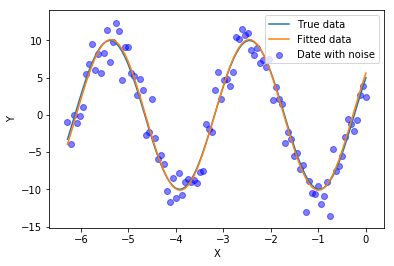

In [8]:
pl.xlabel('X')
pl.ylabel('Y')
pl.plot(x, y0, label="True data")
pl.scatter(x, y1, color='b', alpha=0.5, label="Date with noise") 
pl.plot(x, func(x, plsq[0]),  label="Fitted data") 
pl.legend()

### 2. 非线性方程组求解

optimize库中的fsolve函数可以用来对非线性方程组进行求解。可通过
```python
from scipy.optimize import fsolve
```
导入。它的基本调用形式如下:
```python
fsolve(func, x0)
```
其中，func是计算方程组误差的函数，它的参数x是一个矢量，表示方程组的各个未知数的一组可能解，func返回将x代入方程组之后得到的误差;x0为未知数矢量的初始值。如果要对如下方程组进行求解的话:
$$\begin{align}
    f_1(u_1,u_2,u_3)&=0\\
    f_2(u_1,u_2,u_3)&=0\\
    f_3(u_1,u_2,u_3)&=0
  \end{align}$$
那么func可以如下定义:
```python
def func(x):
    u1,u2,u3=x
    return [f1(u1,u2,u3), f2(u1,u2,u3), f3(u1,u2,u3)]
```

下面是一个实际的例子，求解如下方程组的解:
$$\begin{align}
 5x_1+3&=0\\
 4x_0^2-2\sin(x_1x_2)&=0\\
 x_1x_2-1.5&=0
\end{align}$$

In [43]:
from scipy.optimize import fsolve

In [44]:
def f(x):
    x0 = float(x[0]) #将数组中的元素转化为对应python中的浮点数
    x1 = float(x[1])
    x2 = float(x[2])
    return [5*x1+3, 4*x0*x0 - 2*np.sin(x1*x2), x1*x2 - 1.5]

In [45]:
result = fsolve(f, [1,1,1])

In [46]:
print result

[-0.70622057 -0.6        -2.5       ]


In [47]:
print f(result)

[0.0, -9.1260332624187868e-14, 5.329070518200751e-15]


在对方程组进行求解时，fsolve会自动计算方程组的雅可比矩阵，如果方程组中的未知数很多，而与每 个方程有关的未知数较少时，即雅可比矩阵比较稀疏时，传递一个计算雅可比矩阵的函数将能大幅度 提高运算速度。可以传递给fsovle对应func的雅可比矩阵：
$$\left[ \begin{matrix}
\frac{\partial f_1}{\partial u_1} & \frac{\partial f_1}{\partial u_2} & \frac{\partial f_1}{\partial u_3} \\
\frac{\partial f_2}{\partial u_1} & \frac{\partial f_2}{\partial u_2} & \frac{\partial f_2}{\partial u_3} \\
\frac{\partial f_3}{\partial u_1} & \frac{\partial f_3}{\partial u_2} & \frac{\partial f_3}{\partial u_3}
\end{matrix} \right]$$
加快求解速度。

In [53]:
def j(x):
    x0 = float(x[0])
    x1 = float(x[1])
    x2 = float(x[2])
    return [(0,5,0), (8*x0,-2*x2*np.cos(x1*x2),-2*x1*np.cos(x1*x2)), (0, x2, x1)]

In [54]:
result = fsolve(f, [1,1,1], fprime=j)

In [55]:
result

array([-0.70622057, -0.6       , -2.5       ])

In [56]:
f(result)

[0.0, -9.1260332624187868e-14, 5.329070518200751e-15]

### 3. 数值积分

```python
from scipy import integrate
```

数值积分是对定积分的数值求解，例如可以利用数值积分计算某个形状的面积。下面让我们来考虑一下如何计算半径为1的半圆的面积，根据圆的面积公式，其面积应该等于$\frac{\pi}{2}$。单位半圆曲线可以用下面的函数表示:

In [60]:
from scipy import integrate

In [57]:
def half_circle(x):
    return (1-x**2)**0.5

下面的程序使用经典的分小矩形计算面积总和的方式，计算出单位半圆的面积

In [58]:
N = 10000
x = np.linspace(-1, 1, N)
dx = 2.0/N
y = half_circle(x)
print dx * np.sum(y[:-1] + y[1:]) # 面积的两倍

3.141275168


可以使用scipy.integrate库中的quad函数的话，将会得到非常精确的结果：

In [61]:
pi_half, err = integrate.quad(half_circle, -1, 1)

In [63]:
pi_half*2

3.1415926535897967

多重定积分的求值可以通过多次调用quad函数实现，为了调用方便，integrate库提供了dblquad函数进行二重定积分，tplquad函数进行三重定积分。下面以计算单位半球体积为例说明dblquad函数的用法。单位半球上的点(x,y,z)符合如下方程:
$$
x^2+y^2+z^2=1
$$
因此可以如下定义通过(x,y)坐标计算球面上点的z值的函数:

In [64]:
def half_sphere(x, y):
    return (1-x**2-y**2)**0.5

In [65]:
integrate.dblquad(half_sphere, -1, 1,lambda x:-half_circle(x),lambda x:half_circle(x))

(2.0943951023931984, 1.0002354500215915e-09)

In [67]:
print '利用球体积公式计算得出：',np.pi*4/3/2

利用球体积公式计算得出： 2.09439510239


### 4. Statistical functions
- rv_continuous
- rv_discrete